In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [40]:
df1 = df.groupby('과정').count()
c_list = df1.index.tolist()
n_list = df1.과정명.tolist()
count_list = []

for i in range(len(df)):
    for n in range(len(c_list)):
        if df.loc[i]['과정'] in c_list[n]:
            count = n_list[n]
            break;
    count_list.append(count);
    
df['과정수'] = count_list
df['취업자수'] = df['정원'] * df['취업률'] / 100
display(df)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정,과정수,취업자수
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원,11,18.760
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원,11,12.860
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원,11,18.760
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원,11,9.774
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원,11,18.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사,67,6.000
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사,26,100.000
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사,26,100.000
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사,67,7.035


In [ ]:
print(df.info())
print(df.describe())

df['일일훈련비'] = df['훈련비'] / df['기간']
ndf = df[['취업률', '과정수', '일일훈련비', '기간', '연령대']]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='일일훈련비', y='취업률', data=ndf, ax=ax1)
sns.regplot(x='과정수', y='취업률', data=ndf, ax=ax2, fit_reg=False)

plt.show()
plt.close()

grid_ndf = sns.pairplot(ndf)
plt.savefig('일일훈련비,과정수,기간,연령대,취업률.png')
plt.show()
plt.close()

X = ndf[['기간']]
Y = ndf[['취업률']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(X_test))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

r_square = lr.score(X_test, Y_test)
print(r_square)

,취업률,과정수,훈련비,기간,연령대,취업자수
0,93.8,11,1161380,42,36.0,18.760
1,64.3,11,1106080,40,34.0,12.860
2,93.8,11,1161380,28,31.0,18.760
3,54.3,11,1106080,40,36.0,9.774
4,93.8,11,1161380,28,35.0,18.760
...,...,...,...,...,...,...
15985,50.0,67,802440,20,NaN,6.000
15986,20.0,26,152770,28,NaN,100.000
15987,20.0,26,186500,49,NaN,100.000
15988,46.9,67,2697530,113,NaN,7.035


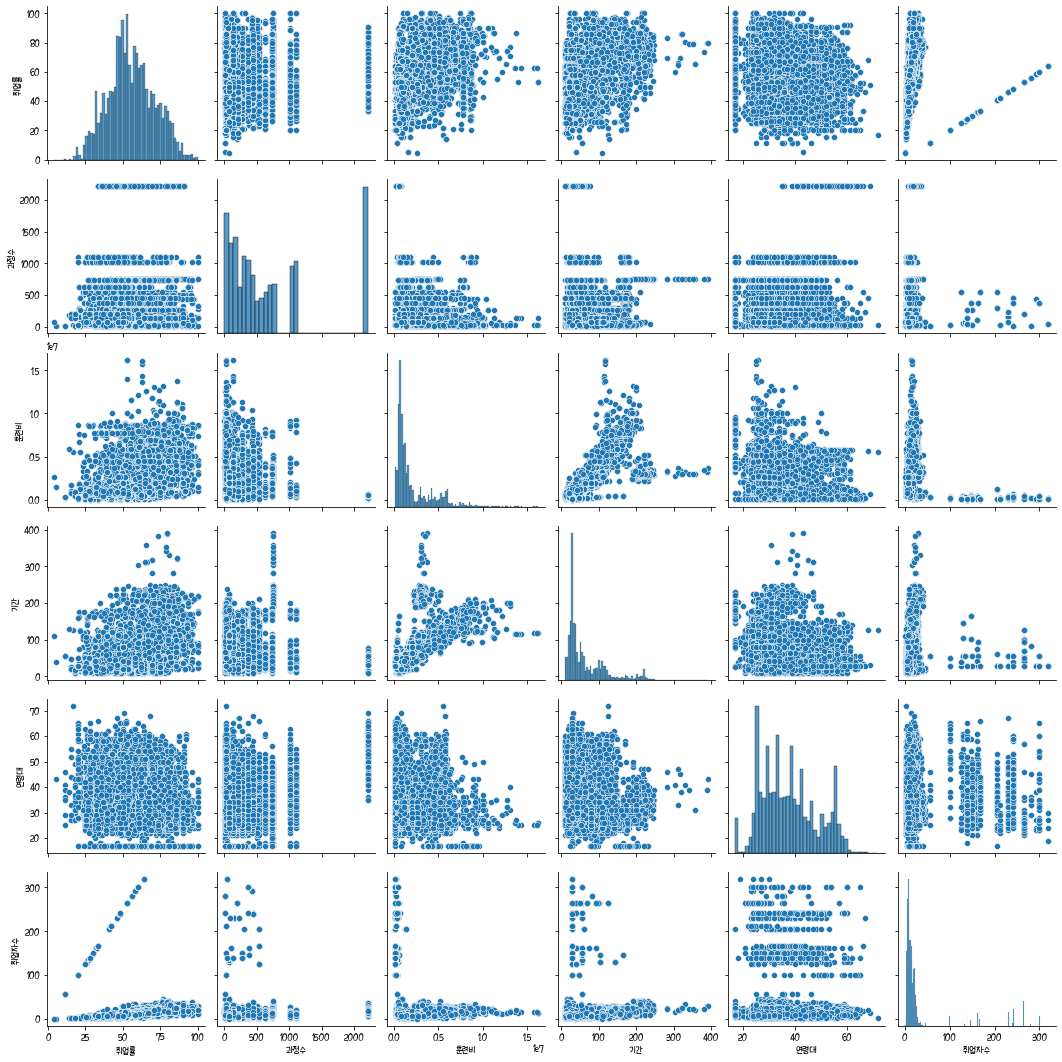

11193
4797
0.014494870517554603
기울기 [[-0.03905679]]
y절편 [56.78723006]


C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


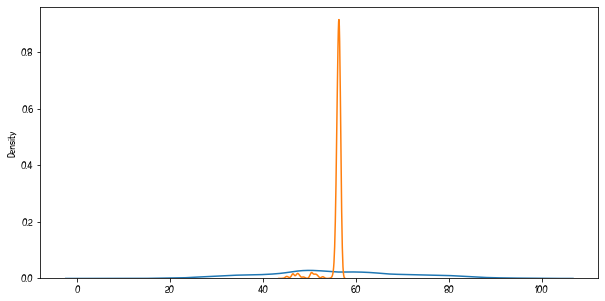

In [44]:
a = df['연령대'] >= 20
tdf = df[a]
b = tdf['연령대'] < 30
tdf = tdf[b]

# t = tdf['NCS'] == '08_문화예술디자인'
# tdf = tdf[t]
tdf = tdf[['취업률', '과정수', '훈련비', '기간', '연령대', '취업자수']]
display(tdf)

grid_tdf = sns.pairplot(tdf)
# plt.savefig('output/08_문화예술디자인.png')
plt.show()
plt.close()

X = tdf[['취업자수']]
Y = tdf[['취업률']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(X_test))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

r_square = lr.score(X_test, Y_test)
print(r_square)

print('기울기', lr.coef_)
print('y절편', lr.intercept_)

Y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist=False, label="y")
ax2 = sns.distplot(Y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

,취업률,과정수,훈련비,단위기간,연령대,기간
13102,92.5,132,8202880,5,25.0,140
13107,27.8,132,62100,1,NaN,28
13116,73.5,132,5731560,4,28.0,109
13119,63.2,132,3786500,3,26.0,86
13131,27.8,132,68310,1,NaN,28
...,...,...,...,...,...,...
14166,68.6,132,5929200,5,NaN,125
14180,87.5,132,5732380,4,NaN,113
14185,75.2,132,6421400,4,NaN,113
14187,62.9,132,5929200,4,NaN,113


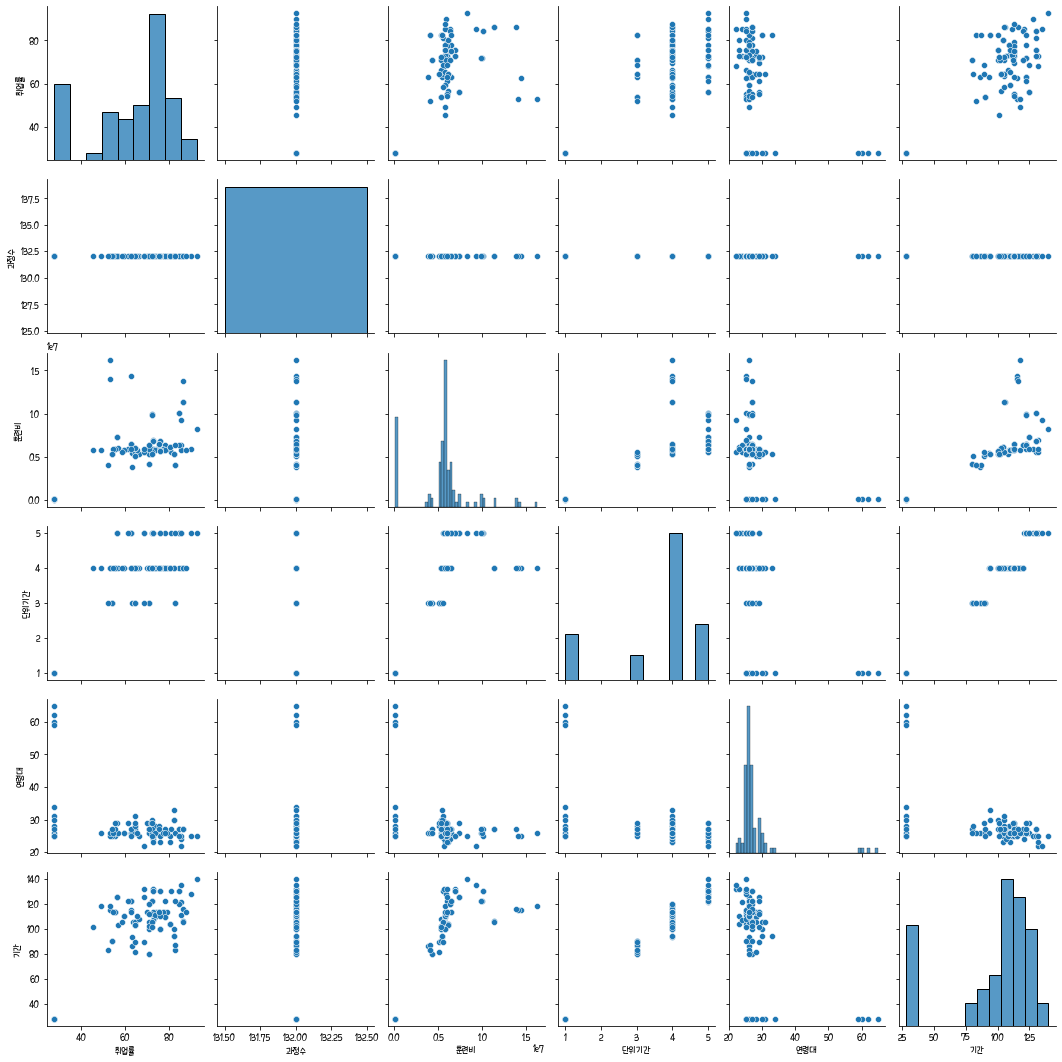

92
40
0.744760727659316
기울기 [[0.46567301]]
y절편 [18.59926262]


C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


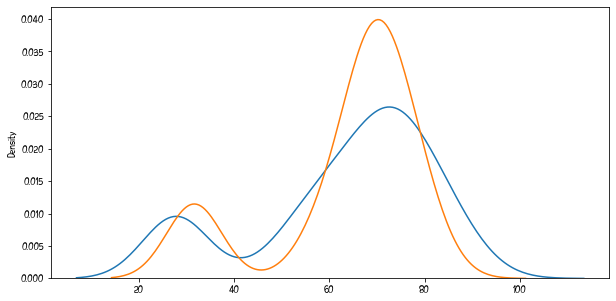

In [36]:
period_list = []
p=0;
for i in range(len(df)):
    p = df.loc[i]['기간']
    if p <= 30:
        p = 1
    elif 30 < p <= 60:
        p = 2
    elif 60 < p <= 90:
        p = 3
    elif 90 < p <= 120:
        p = 4
    elif 120 < p <= 150:
        p = 5
    elif 150 < p <= 180:
        p = 6
    else:
        p = 7
    period_list.append(p);
    
df['단위기간'] = period_list

big = df['과정'] == '빅데이터'
df_c = df[big]
df_p = df_c[['취업률', '과정수', '훈련비', '단위기간', '연령대', '기간']]
display(df_p)

grid_tdf = sns.pairplot(df_p)
# plt.savefig('output/08_문화예술디자인.png')
plt.show()
plt.close()

X = df_p[['과정수']]
Y = df_p[['취업률']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(X_test))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

r_square = lr.score(X_test, Y_test)
print(r_square)

print('기울기', lr.coef_)
print('y절편', lr.intercept_)

Y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist=False, label="y")
ax2 = sns.distplot(Y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

,취업률,과정수,훈련비,기간,연령대,취업자수
과정,,,,,,
IoT,73.166667,20.0,7.801728e+06,117.222222,26.888889,325.076
UI/UX개발자,71.376768,150.0,5.715234e+06,110.313131,25.828283,2462.814
가구제작,83.400000,23.0,7.811580e+06,138.500000,28.000000,355.862
간호조무사,75.889655,745.0,2.987692e+06,210.931034,27.879310,18969.097
건설플랜트,98.000000,6.0,4.922050e+06,86.833333,25.000000,176.400
...,...,...,...,...,...,...
항공정비사,43.883333,13.0,4.060640e+06,89.166667,22.000000,162.816
헤어디자이너,61.856410,733.0,1.800106e+06,64.034188,26.512821,7050.963
화훼장식전문가,36.407143,131.0,1.093457e+06,20.142857,27.357143,728.435


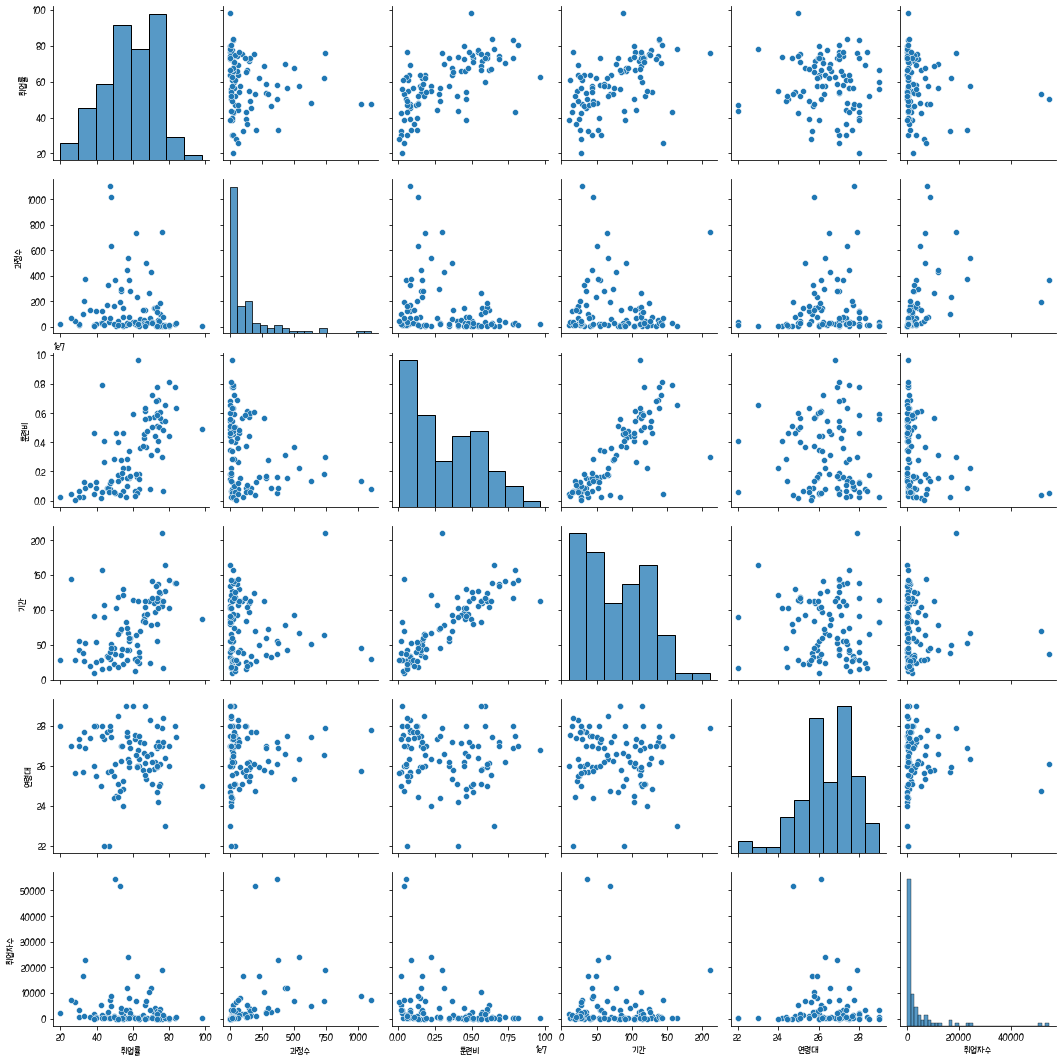

67
30
-0.039112781313816125
기울기 [[-0.00031917]]
y절편 [60.57436361]


C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


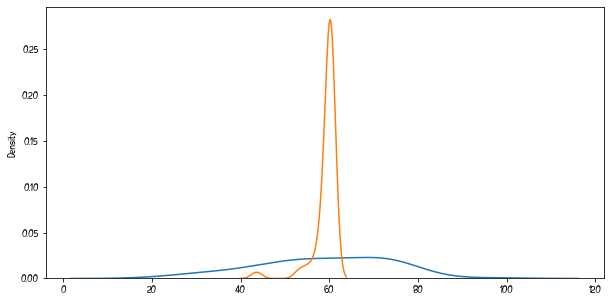

In [48]:
a = df['연령대'] >= 20
tdf = df[a]
b = tdf['연령대'] < 30
tdf = tdf[b]

tdf = tdf.groupby(by='과정').mean()
df_s = df.groupby(by='과정').sum()
tdf['취업자수'] = df_s['취업자수'] 

tdf = tdf[['취업률', '과정수', '훈련비', '기간', '연령대', '취업자수']]
display(tdf)

grid_tdf = sns.pairplot(tdf)
# plt.savefig('output/08_문화예술디자인.png')
plt.show()
plt.close()

X = tdf[['취업자수']]
Y = tdf[['취업률']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(X_test))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

r_square = lr.score(X_test, Y_test)
print(r_square)

print('기울기', lr.coef_)
print('y절편', lr.intercept_)

Y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist=False, label="y")
ax2 = sns.distplot(Y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

,취업률,과정수,훈련비,기간,연령대,취업자수
과정,,,,,,
전기산업기사/기사,50.271429,370.0,5.308900e+05,36.714286,26.107143,54582.333
반도체,52.900000,195.0,3.809677e+05,69.284091,24.727273,51577.500
시각디자인,57.337023,540.0,2.268128e+06,66.622137,26.320611,24125.458
직업상담,33.310000,373.0,8.793670e+05,51.800000,26.900000,22921.653
간호조무사,75.889655,745.0,2.987692e+06,210.931034,27.879310,18969.097
...,...,...,...,...,...,...
블록체인,72.800000,2.0,6.851520e+06,134.500000,27.000000,37.560
폐기물관리,66.700000,2.0,5.625010e+06,83.000000,29.000000,30.015
금속도장,63.600000,5.0,1.824220e+06,32.000000,26.000000,19.080


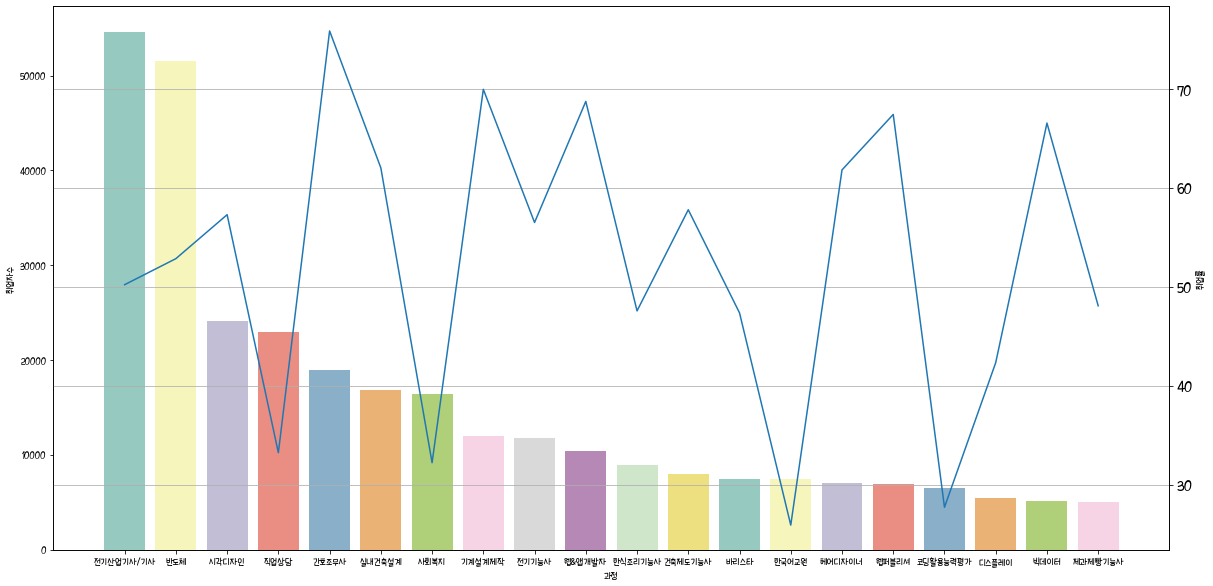

In [54]:
sdf = tdf.sort_values(by=['취업자수'], ascending=False)
display(sdf)
sdf= sdf.head(20)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)

sns.barplot(x=sdf.index, y='취업자수', data=sdf, palette='Set3', ax=ax1)
ax2 = plt.twinx()
sns.lineplot(x=sdf.index, y="취업률", data=sdf, palette="rocket", ax=ax2)
plt.xticks(size=15, rotation=30)
plt.yticks(size=15)
plt.grid(True)

plt.show()
plt.close()